# Regression v Classification Tasks in Machine Learning

In machine learning, there are two main types of learning algorithms: supervised and unsupervised. In this notebook, we'll focus on **supervised** learning. Supervised learning means that we have labeled inputs and outputs we can use to create models that can learn from this data to make predictions about future. Within this type of learning, we can summarize most problems into one of two categories:
### 📈 Regression
Problems associated with predicting **continuous** values (i.e. a dollar value on a home, the temperature for tomorrow, the flow of product through a pipe)

### 🔢 Classification
Problems associated with predicting **discrete** values (i.e. identify whether the image is of a cat/dog/horse/mouse, should I buy or sell a stock, is my product contaminated or not?)

## Imports/Helper Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

sns.set_style('whitegrid')

In [2]:
def create_regression_data(n_samples: int):
    x1 = np.random.rand(n_samples)  # concentration of feed material
    x2 = np.random.randint(low=200, high=300, size=n_samples)  # avg. temperature of the reactor
    
    y = 150 * x1  + 3 * x2 + 30 + np.random.randint(low=150, high=250, size=n_samples)
    
    df = pd.DataFrame(data=np.vstack([x1, x2, y]).T, columns=['x1', 'x2', 'y'])
    
    return df


def create_classification_data(n_samples: int):
    x1 = np.random.randint(low=1, high=20, size=n_samples)  # age of the pump
    x2 = np.random.randint(low=100, high=500, size=n_samples)  # capacity of the pump
    x3 = np.random.randint(low=25, high=100, size=n_samples)  # average temperature of the pump when running
    
    y = []
    
    for i in range(n_samples):
        if x1[i] > 15 and np.random.uniform() > 0.33:
            y.append(1)
        elif x1[i] > 10 and x2[i] > 300 and np.random.uniform() > 0.5:
            y.append(1)
        elif x1[i] > 3 and x3[i] > 85:
            y.append(1)
        else:
            y.append(0) 
    
    df = pd.DataFrame(data=np.vstack([x1, x2, x3, y]).T, columns=['x1', 'x2', 'x3', 'y'])
    
    return df
        
        
def create_regression(features: list, target: str, data: pd.DataFrame):
    X = data[features]
    y = data[target]
    
    if len(features) == 1:
        X = np.array(X).reshape(-1, 1)  # reshaping when only one feature is used
    
    lm = LinearRegression().fit(X, y)  # creating the regression
    predictions = lm.predict(X)
    
    # Plotting the results
    if len(features) == 1:
        print(f"The model takes the form of y = {round(lm.coef_[0], 4)}x + {round(lm.intercept_, 4)}")
        print("The model's R2 is equal to", round(lm.score(X, y), 4))
        
        plt.scatter(X, y, c='black', alpha=0.5)
        plt.plot(X, predictions, c='red')
        plt.xlabel(features[0], fontweight='bold')
        plt.ylabel(target, fontweight='bold')
        plt.show()
    else:
        print(f"The model takes the form of y = {round(lm.coef_[0], 4)}x1 + {round(lm.coef_[1],4)}x2 + {round(lm.intercept_, 4)}")
        print("The model's R2 is equal to", round(lm.score(X, y), 4))
        fig = plt.figure(figsize = (11, 8))
        ax = plt.axes(projection ="3d")
        x1 = data[features[0]]
        x2 = data[features[1]]
        y = data[target]

        # Creating plot
        ax.plot_trisurf(x1, x2, predictions, alpha=0.5, linewidth = 0, antialiased = True, color='red')
        ax.scatter3D(x1, x2, y, color = "black")
        ax.set_xlabel('x1', fontweight ='bold')
        ax.set_ylabel('x2', fontweight ='bold')
        ax.set_zlabel('y', fontweight ='bold')
        plt.title("simple 3D scatter plot")
        ax.view_init(190, 180)
        plt.show()
        
    return lm


def create_classification(features: list, target: str, data=pd.DataFrame):
    X = data[features]
    y = data[target]
    
    logm = LogisticRegression().fit(X, y)
    predictions = logm.predict(X)
    
    sns.heatmap(confusion_matrix(y, predictions), 
                annot = True, 
                fmt='d', 
                annot_kws={'fontsize': 20, 'fontstyle': 'oblique'}, 
                cbar = False)
    print(classification_report(y, predictions))
    
    return logm

## 📈 Regression

Many of you will be quite familiar with regression as you've likely dealt with linear regression in the past. This is one of many algorithms which can be applied to solve a regression problem. Due to it's simplicity and comprehensability, it's a good start to characterize the relationships between your inputs and outputs. However, as is often the case, the relationships we deal with are not linear and so we must often use different techniques to characterize these relationships, but we'll save that conversation for a later video 😉

### Example
Let's do a quick example to solidify what we've just discussed. 

Assume we have a process where where we have two variables and a single output, they are labeled as follows:

- `x1` = concentration of key material feed
- `x2` = average temperature of the reactive vessel
- `y` = lbs of product produced

For this example, we'll be creating random data which we'll use to create our regression model.

In [3]:
df = create_regression_data(n_samples=1000)  # creating 1000 random observations
df.head()

,x1,x2,y
0,0.820716,236.0,1040.107397
1,0.018306,236.0,896.745890
2,0.621863,266.0,1099.279397
3,0.538687,210.0,893.803080
4,0.843896,234.0,1038.584362


Now that we have data, we can create a model that will predict `y`. Let's first do a simple linear regression where we only use `x1` and view the results:

The model takes the form of y = 140.8149x + 981.3062
The model's R2 is equal to 0.1689


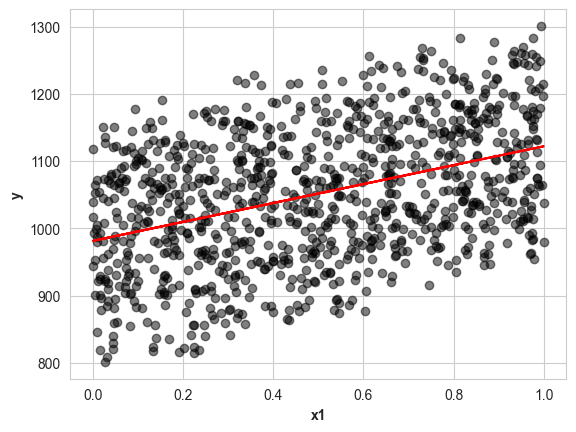

In [4]:
lr = create_regression(features=['x1'], target='y', data=df)

Hmmm, not great. By looking at our R2, we can see that `x1` is not sufficient in explaining `y`. What if we include `x2` and turn this into a multiple linear regression problem?

The model takes the form of y = 150.4712x1 + 3.0135x2 + 224.9035
The model's R2 is equal to 0.9143


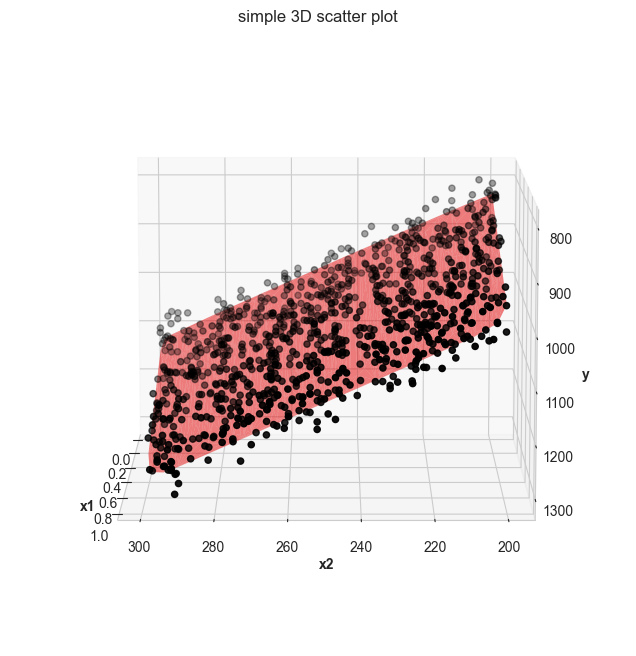

In [5]:
mlr = create_regression(features=['x1', 'x2'], target='y', data=df)

There we go! We now see much better results and we can trust this model a lot more than the previous one. As you can also see from the plot, we have now plotted a plane rather than a line since we introduced another feature (which means we added a dimension) into our regression algorithm.

Now whenever we have new datapoints for the feed concentration and temperature, we can determine how many lbs of product we will generate. Let's assume we have an `x1` (concentration of key material) = 0.6 and `x2` (temperature of vessel) = 250, what is the expected product flow?

In [6]:
X = np.array([0.6, 250]).reshape(-1,2)

mlr.predict(X)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1068.5491677])

Awesome, our model predicts we'll have a product flow of 1,068! 

## 🔢 Classification

Classification is a task that may not be as familiar as regression. As I mentioned above, classification helps us to predict **discrete** values (think integers). Consequently, these discrete values represent a state or a category. A common example is that of a valve: *typically* a **0** indicates that the valve is closed, while a **1** indicates that the valve is open. 

So classification could help you with predicting whether a valve is closed or open, but there are many more interesting and useful problems it can help solve. In the following example, we'll create a classification model that will tell us whether a pump will fail in the current year - let's do it!

### Example

The classification model we'll use in this example is a **logistic regression model**. I don't want to get into the nuances of it, but it's the most basic type of classification model and you can read more about it [here](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc).

Like with the regression example, we'll generate some random data for pumps that have failed over the past year. The data we'll generate is the following:

- `x1` = age of the pump in years
- `x2` = flow rate of the pump
- `x3` = average temperature of the pump
- `y` = pump failure (**1** = pump failure, **0** = pump did not fail)

In [8]:
df = create_classification_data(n_samples=1000)
df.head()

,x1,x2,x3,y
0,2,340,71,0
1,11,230,36,0
2,4,345,91,1
3,13,165,76,0
4,10,369,94,1


Now we'll go ahead and create a classification model. After the model is created, we see the following results:

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       677
           1       0.74      0.69      0.71       323

    accuracy                           0.82      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.82      0.82      0.82      1000



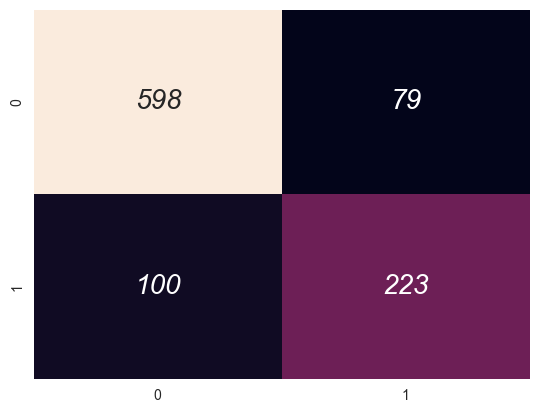

In [9]:
logm = create_classification(features=['x1', 'x2', 'x3'], target='y', data=df)

**Some technical stuff - feel free to skip!**

First, looking at the colorful boxes - each box represents a category of our model's predictions:

- `Top Left` = `True Negatives`, which is the number of pumps that the model **correctly** guessed that would **NOT** fail and did not
- `Top Right` = `False Positives`, which is the number of pumps that the model **wrongly** guessed that would fail but did not
- `Bottom Left` = `False Negatives`, which is the number of pumps that the model **wrongly** guessed that would **NOT** fail but did
- `Bottom Right` = `True Positives`, which is the number of pumps that the model **correctly** guessed that would fail and did

Knowing those numbers, we can then calculate metrics like precision, recall and f-1 score:
- `precision` = `True Positives` / (`True Positives + False Positives`) 
    - Provides a measure detailing how many positive identifications were correct. 
- `recall` = `True Positives` / (`True Positives + False Negatives`)
    - Provides a measure detailing how many real positives were labeled correctly. 
- `f1-score` = 2 * `precision * recall` / (`precision + recall`) 
    - This is the harmonic mean of recall and precision and gives you a nice blend of the two metrics.

**Ok - stop skipping now!**

Overall, the model accuracy was at **82%** meaning that this model could be considered quite decent at predicting whether a pump would fail or not. Similar to the regression example, we could now use this test whether a single pump would fail or not over the next year. Assuming we have a pump that is 5 years old, has a flow capacity of 100 gpm, and typically runs at 50 degC:

In [10]:
X = np.array([5, 100, 50]).reshape(-1,3)

logm.predict(X)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

We predict a value of **0**, which means that we should NOT expect for this pump to fail. Woohoo!

## Conclusion

With that, we wrap up this short introduction on regression and classifciation tasks. While these are quite broad and shallow topics in the field of machine learning, they are a good jump off point to dive deeper into the field of machine learning. For example, in these demonstrations we used the most basic of the machine learning models to demonstrate these ideas, but there are many more interesting and powerful models that can predict quite complicated relationships. 